# Personal Loan Campaign Modelling

This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

#### Domain
Banking

#### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer. 
- CCAvg: Avg. spending on credit cards per month 
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

#### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing basic python libraries 

import pandas as pd                                             # library for working with dataframes
from sklearn.linear_model import LinearRegression

import numpy as np                                              # library for working with arrays
import os, sys
from scipy import stats

from sklearn import metrics

import matplotlib.pyplot as plt                                 # library for data visualization
%matplotlib inline

import seaborn as sns                                           # libaray for data visualization 
from sklearn.model_selection import train_test_split

In [3]:
# Reading data from data sheet

df=pd.read_csv("Bank_Personal_Loan_Modelling.csv") 

In [4]:
# Displaying the Data upto 10 rows

df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
# Since ID column is like an index and does not provide any value to the analysis dropping the column

pl_df = df.drop('ID', axis=1)
pl_df.head (10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
# Displaying and checking datatypes of all the 13 columns 

pl_df.info()

# Here Zip Code, Education, Personal Loan, Secutities Account, CD Account, Online and Credit card are having incorrect data type.
# There columns are not actually integer values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [7]:
# Display the Statistical Summary of the data.

pl_df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# Checking the no. of columns and rows in the data set

pl_df.shape

(5000, 13)

In [9]:
# Cheking for any null values in the data set.

pl_df.isnull().values.any()

False

In [10]:
pl_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
# Since there is no null values so not removing any null from the data set

#### 2. EDA: Study the data distribution in each attribute and target variable, share your findings. (20 marks)

#####  Number of unique in each column?

In [12]:
pl_df.nunique()

# This gives the no. of unique values for each column. For example in Age there are 45 unique value starting from age 23 to 67. 
# Similar analysis can be done for the rest of the columns with their no. of unique values.

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#####  Number of people with zero mortgage?

In [13]:
pl_df['Mortgage'].value_counts()

# From the below we can analyze that a total of 3462 people have zero mortgage.

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

#####  Number of people with zero credit card spending per month?

In [14]:
pl_df['CCAvg'].value_counts().sort_index()

# From the below we can analyze that a total of 106 people have zero credit card spending per month.

0.0     106
0.1     183
0.2     204
0.3     241
0.4     179
       ... 
8.8       9
8.9       1
9.0       2
9.3       1
10.0      3
Name: CCAvg, Length: 108, dtype: int64

#####  Value counts of all categorical columns.

In [15]:
# First we can sepearte numercial and categorical data from the above data set

num_df = pl_df._get_numeric_data()

cat_columns = set(pl_df.columns)-set(num_df.columns)
cat_df = pl_df[cat_columns]

In [16]:
# In the data set we have 7 Categorical columns 
# ZIP Code, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard

pl_df.groupby(['Personal Loan','Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'])['ZIP Code'].value_counts()

Personal Loan  Education  Securities Account  CD Account  Online  CreditCard  ZIP Code
0              1          0                   0           0       0           94720       19
                                                                              94305       16
                                                                              92037        9
                                                                              92121        9
                                                                              95616        9
                                                                                          ..
1              3          1                   1           1       1           91380        1
                                                                              92056        1
                                                                              93407        1
                                                                            

In [17]:
#The above helps to see the relationship of Perosnal Loans with respect to Zip Code, Education, Securities, CD Account, Online and Credit Card

In [18]:
pl_df[pl_df['Personal Loan'].isnull()]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


#####  Univariate Plots

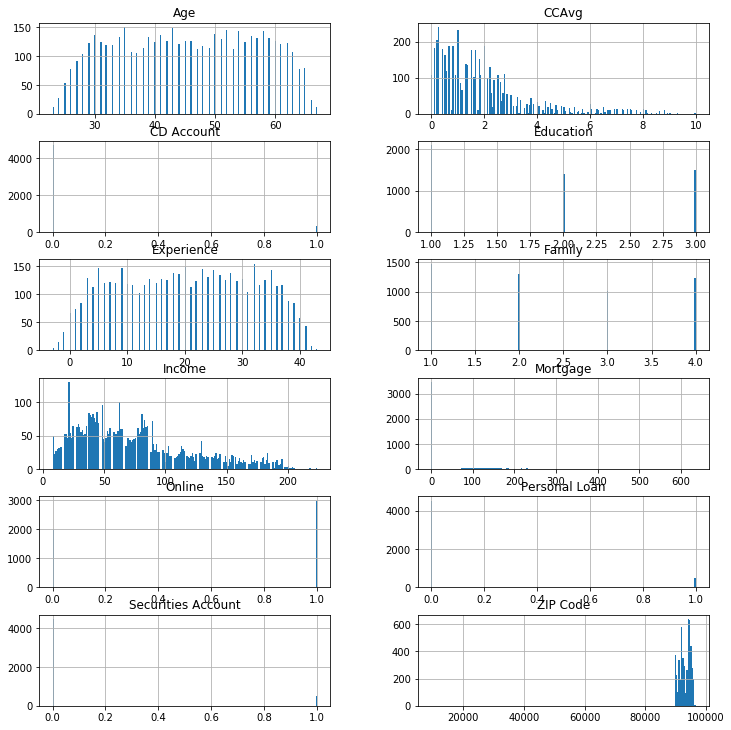

In [19]:
columns = list(pl_df)[0:-1] 
pl_df[columns].hist(stacked=False, bins=200, figsize=(12,30), layout=(14,2)); 
# Histogram of the 8 columns

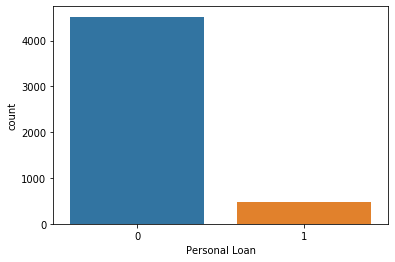

In [20]:
# Univariate plot for the column 'Personal Loan' 
# Using count plot for Personal Loan to show the count of the Personal Loan taken last year.

sns.countplot(pl_df['Personal Loan']);

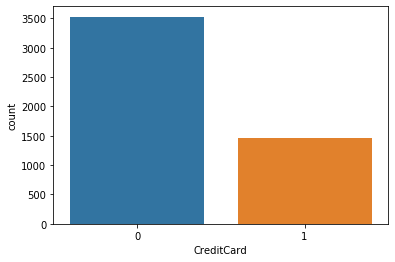

In [21]:
# Univariate plot for the column 'Credit Card' 
# Using count plot for Credit Card to show the count of how many cutomers have Credit Card from the bank.

sns.countplot(pl_df['CreditCard']);

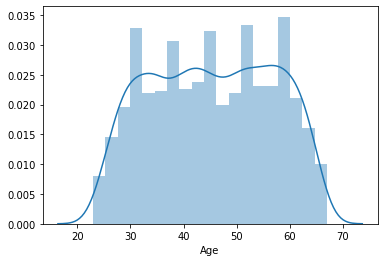

In [22]:
# Univariate plot for the column 'Age' 
# Using dist plot for age to show the frequency distribution of age.

sns.distplot(pl_df['Age'])

#####  BiVariate Plots

In [23]:
    # Let's look at the target variable which is Personal Loan to understand how the data is distributed along the other fields
    pl_df.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# All the higher median are for people who have taken Personal Loan last year

In [25]:
# Let us look at the target column 'Personal Loan' to understand how the data is distributed amongst the various fields
pl_df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [26]:
# All the higher mean are for people who have taken Personal Loan last year except for people who have less work experience

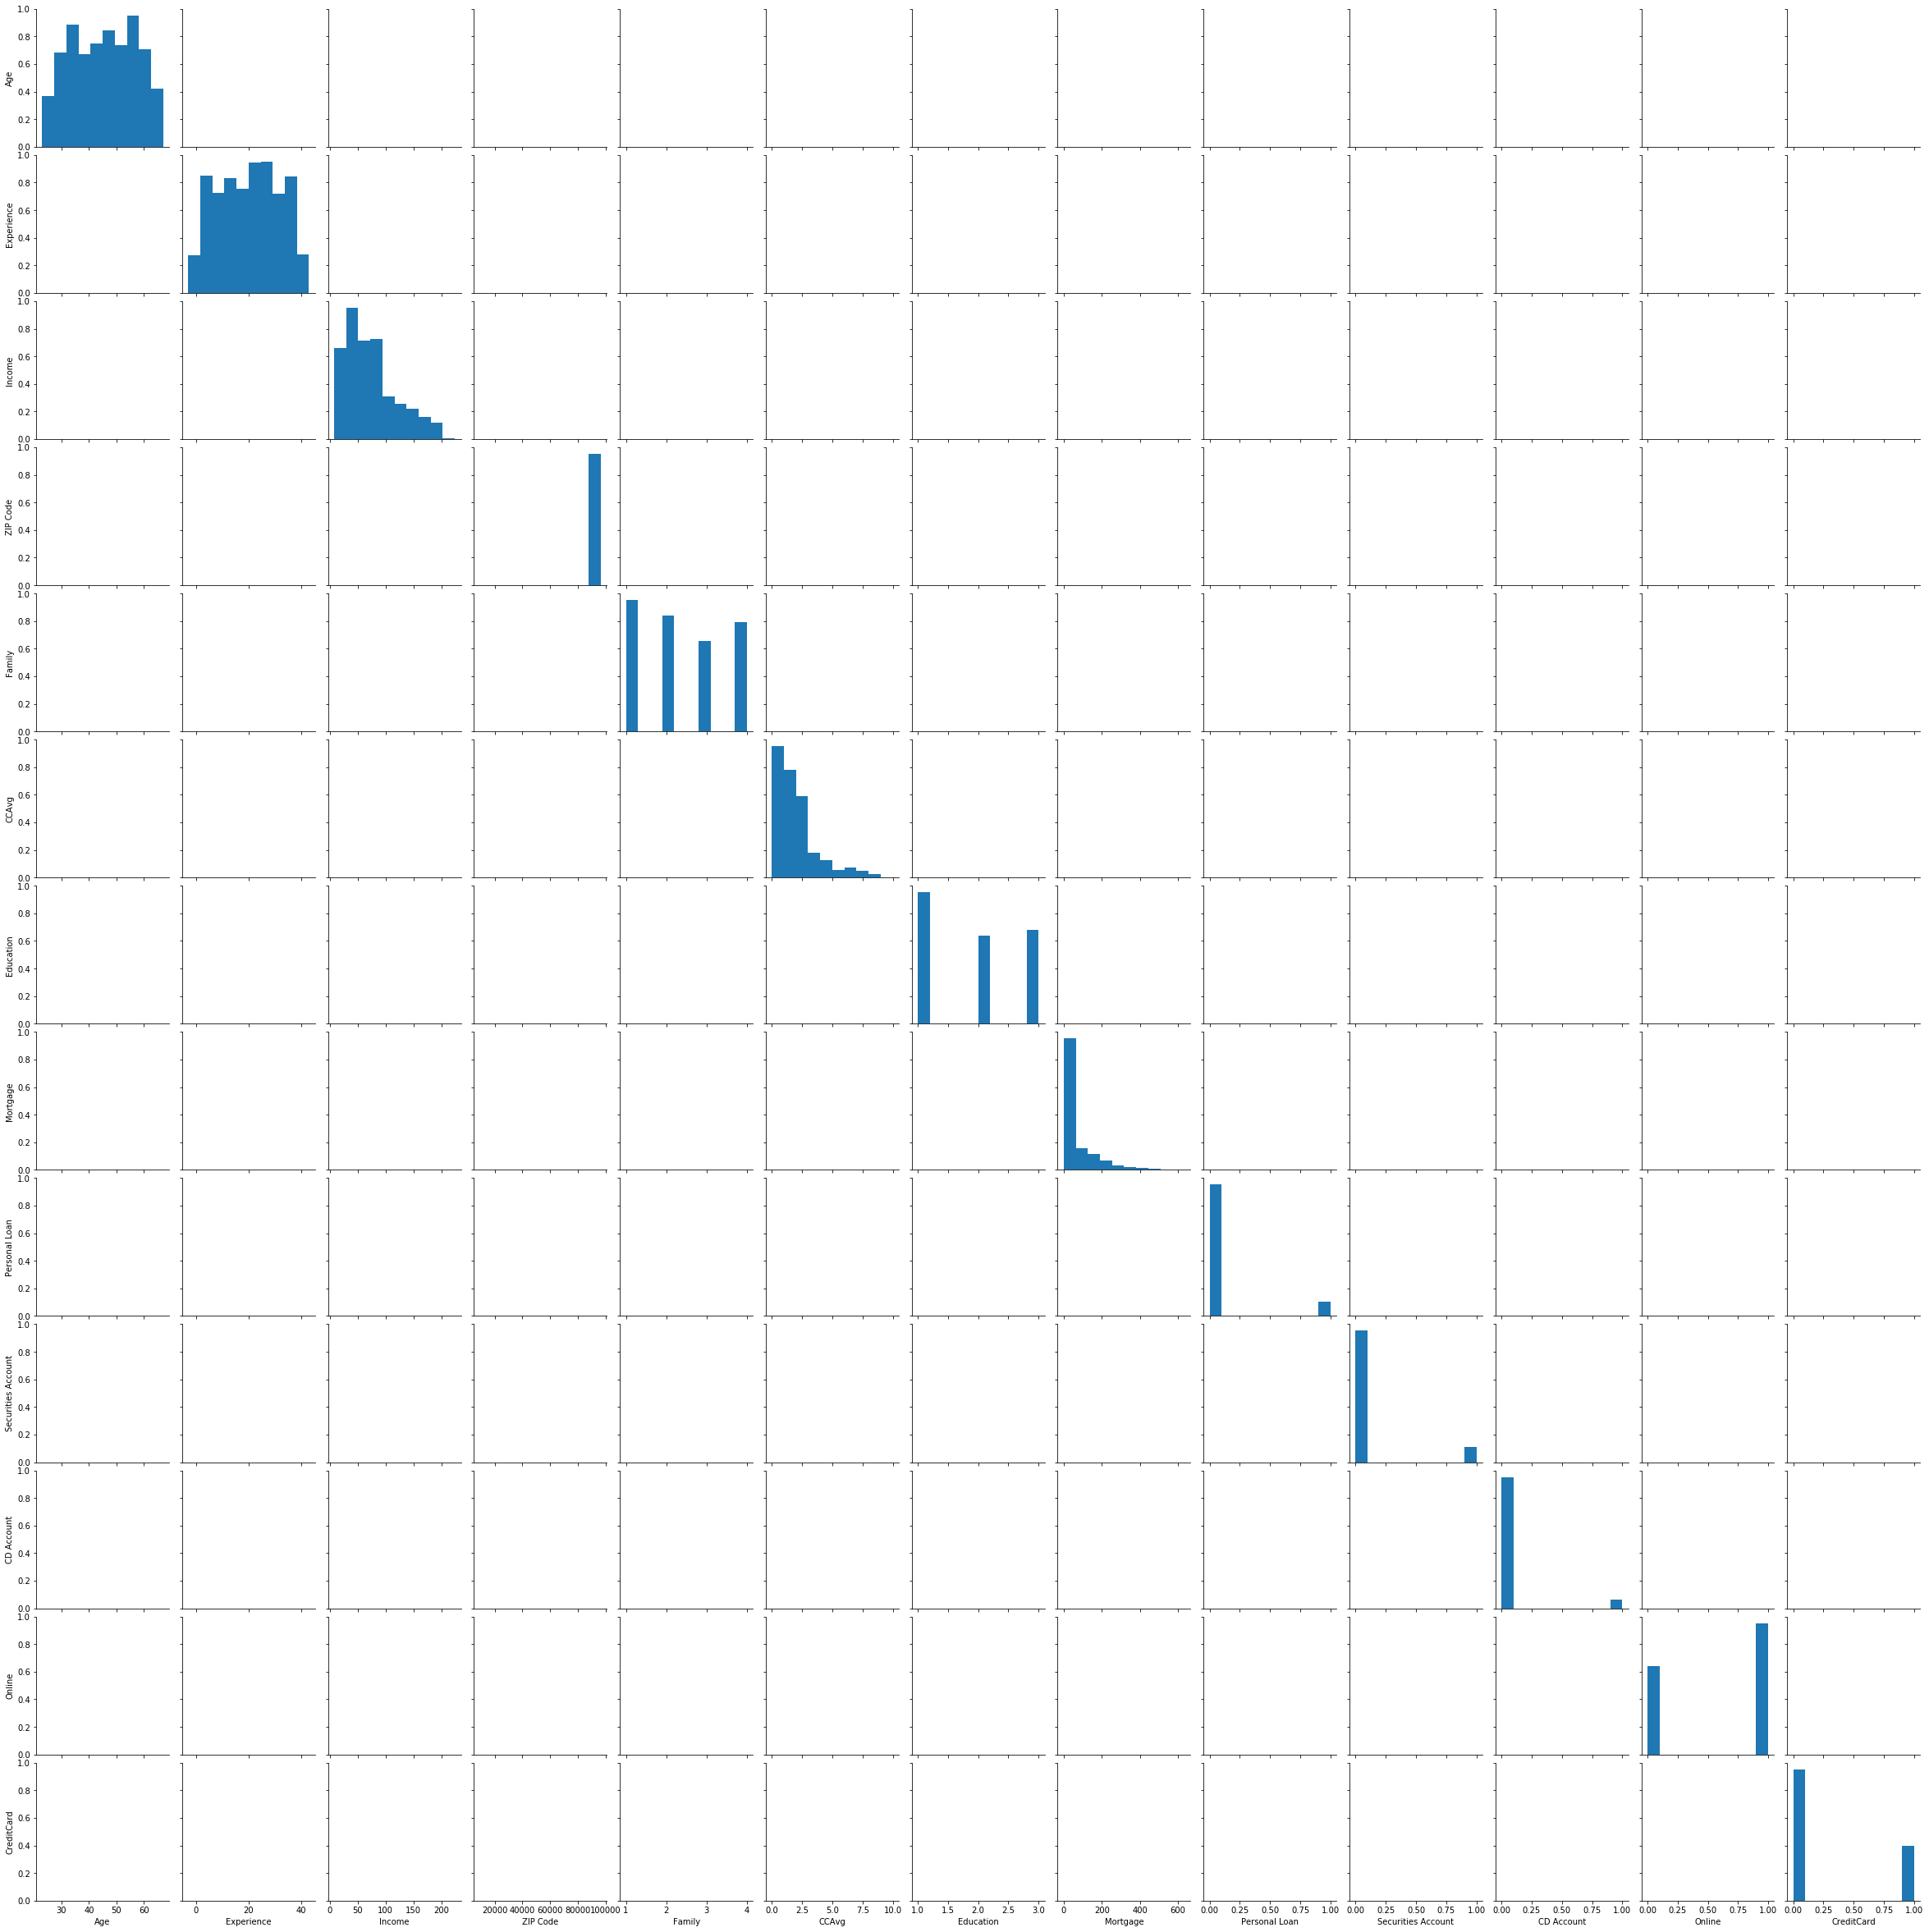

In [27]:
# Check distributions of all the field variables
sns.pairplot(pl_df, kind='kde')
plt.show()

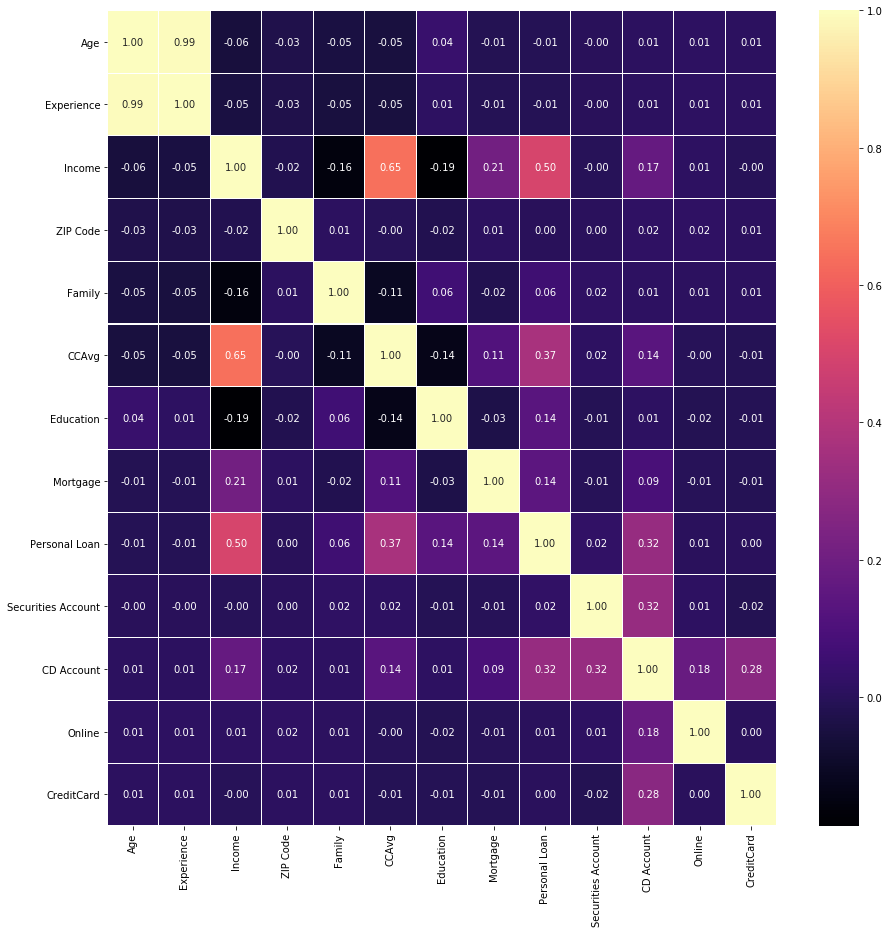

In [28]:
# Heatmap to show Correlation
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pl_df.corr(),ax=ax, annot=True, linewidths=0.1, fmt='.2f', cmap="magma")   # this is for color intensity
plt.show()

In [29]:
pl_df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [30]:
# We see high correlation between age and experience.

#####  Get data model ready

In [31]:
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


#### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [32]:
# We will use 70% of the data for training and 30% of the data for test

In [33]:
X = pl_df.drop('ZIP Code',axis=1)     # Predictor feature columns
Y = pl_df['ZIP Code']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,0,1,0


In [34]:
# Lets check the split

In [35]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pl_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pl_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

In [36]:
# We build the Logistic Regression model
# Changing the data types of the feilds
import statsmodels.api as sm

#logit = sm.Logit(y_train, sm.add_constant(x_train))
#lg = logit.fit()

lg = sm.OLS(Y, X.astype(float)).fit()

In [37]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ZIP Code   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.515e+05
Date:                Wed, 05 Aug 2020   Prob (F-statistic):                        0.00
Time:                        16:03:10   Log-Likelihood:                         -49552.
No. Observations:                5000   AIC:                                  9.913e+04
Df Residuals:                    4988   BIC:                                  9.921e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                 3599.2957     13.576    265.116      0.000    3572.680    3625.911
Experience         -3546.2065     16.794   -211.155      0.000   -3579.131   -3513.282
Income                18.2402      2.210      8.254      0.000      13.908      22.573
Family               344.2083     61.728      5.576      0.000     223.194     465.223
CCAvg               -100.1434     52.013     -1.925      0.054    -202.112       1.825
Education           -710.5956     89.373     -7.951      0.000    -885.806    -535.385
Mortgage               0.8383      0.696      1.205      0.228      -0.526       2.202
Personal Loan       -815.9336    298.636     -2.732      0.006   -1401.392    -230.475
Securities Account   111.6398    241.302      0.463      0.644    -361.418     584.698
CD Account           128.5327    348.233      0.369      0.712    -554.158     811.223
Online               522.3161    143.454      3.641      0.000     241.084     803.548
CreditCard           392.4927    159.871      2.455      0.014      79.075     705.911
==============================================================================
Omnibus:                     2884.081   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102222.044
Skew:                          -2.157   Prob(JB):                         0.00
Kurtosis:                      24.727   Cond. No.                         750.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Here for most of the variables including the target variables P>|t| values is less than 0.5 so our model is good and correctly predicted

In [39]:
# Verifying all the coef 

lg.params

Age                   3599.295711
Experience           -3546.206496
Income                  18.240194
Family                 344.208279
CCAvg                 -100.143375
Education             -710.595630
Mortgage                 0.838298
Personal Loan         -815.933615
Securities Account     111.639774
CD Account             128.532684
Online                 522.316110
CreditCard             392.492654
dtype: float64

In [40]:
# Calculating the odds ratio and probablity from the coef 

lgcoef = pd.DataFrame(lg.params, columns = ['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [41]:
lgcoef

,coef,Odds_ratio,probability,pval
Age,3599.30,inf,nan,0.00
Experience,-3546.21,0.00,0.00,0.00
Income,18.24,83486402.46,1.00,0.00
Family,344.21,30743713752949328255100548137930591006617561320...,1.00,0.00
CCAvg,-100.14,0.00,0.00,0.05
Education,-710.60,0.00,0.00,0.00
Mortgage,0.84,2.31,0.70,0.23
Personal Loan,-815.93,0.00,0.00,0.01
Securities Account,111.64,30516707600148285404090863062637603963396109107...,1.00,0.64
CD Account,128.53,66227032386562576143976066697732830444715488643...,1.00,0.71


In [42]:
# People with Mortgage have 70% probablity to take a Personal Loan

In [2]:
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(random_state=30)
logreg.fit(x_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [1]:
y_predict =logreg.predict(x_test)

NameError: name 'logreg' is not defined

In [53]:
# getting confusion matrix
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True, fmt='.2f',  xticklabels = [0,1], yticklabels = [0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.03514285714285714

Testing accuracy 0.028

Confusion Matrix


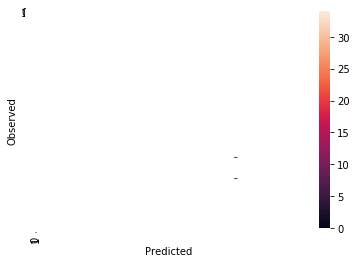

None


In [54]:
print("Training accuracy",logreg.score(x_train,y_train))
print('')
print("Testing accuracy",logreg.score(x_test,y_test))
print('')
print("Confusion Matrix")
print(draw_cm(y_test, y_predict))

In [ ]:
# Here training accurancy is greater than testing accuracy. And we want testing accurancy greater than training accuracy.

#### 5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

In [58]:
# We need to make the accuracy better.
# Checking parameters for logistic regression.

logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 30,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
# Checking different values of 'solver'

train_score=[]
test_score=[]
solver = ['liblinear','saga']
for i in solver:
    model = LogisticRegression(random_state=30, penalty = 'l1',C=0.80, solver=i)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train,y_train),2))
    test_score.append(round(model.score(x_test,y_test),2))
print(solver)
print(train_score)
print(test_score)

['liblinear', 'saga']
[0.04, 0.04]
[0.03, 0.03]


In [68]:
# Accuracy is same with liblinear and saga.

In [67]:
# Choosing any one 
model = LogisticRegression(random_state=30, penalty = 'l1', solver = 'liblinear', class_weight ='balanced')

model.fit(x_train,y_train)
y_predict = model.predict(x_test)

print("Training accuracy", model.score(x_train,y_train))
print("Testing accuracy", model.score(x_test,y_test))

Training accuracy 0.032857142857142856
Testing accuracy 0.0


In [70]:
# Testing Accuracy is 0 here.

#### 6. Give Business understanding of your model? (5 marks)

In [71]:
# There is low chances for people to take personal loan next year. And people with Credit card are most likely to take personal loans.